- Objective: The aim is to build a predictive model and find out the sales of each product at a particular store.
- DecisionTree gave the best result with R2 score as 76.3% and rmse as 49.9%

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Reading the Data

In [2]:
df = pd.read_csv('Train.csv')
df.shape

(8523, 12)

In [3]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [4]:
df.tail(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8513           FDH31       12.000          Regular         0.020407   
8514           FDA01       15.000          Regular         0.054489   
8515           FDH24       20.700          Low Fat         0.021518   
8516           NCJ19       18.600          Low Fat         0.118661   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8513                Meat   99.9042            OUT035   
8514              Canned   57.5904            OUT045   
8515        Baking Goods  157.5288            OUT018   
8516              Others   58.7588            OUT018   
8517        Frozen Foods  178.8318            OUT046   
8518         Snack Foods  214.5218            OUT013   
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8513                       2004       Small               Tier 2   
8514                       2002         NaN               Tier 2   
8515                       2009      Medium               Tier 3   
8516                       2009      Medium               Tier 3   
8517                       1997       Small               Tier 1   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8513  Supermarket Type1           595.2252  
8514  Supermarket Type1           468.7232  
8515  Supermarket Type2          1571.2880  
8516  Supermarket Type2           858.8820  
8517  Supermarket Type1          3608.6360  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Describing the Data

In [6]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [7]:
df.describe(include='O')

Item_Identifier Item_Fat_Content              Item_Type  \
count             8523             8523                   8523   
unique            1559                5                     16   
top              FDG33          Low Fat  Fruits and Vegetables   
freq                10             5089                   1232   

       Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
count               8523        6113                 8523               8523  
unique                10           3                    3                  4  
top               OUT027      Medium               Tier 3  Supermarket Type1  
freq                 935        2793                 3350               5577

# Checking Missing and Unique Values

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Counts of the Classes in the Categorical Columns

In [10]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [12]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

# Imputing missing Value of Numerical Column with Mean

In [16]:
#df['Item_Weight'].fillna(value=df['Item_Weight'].mean(),inplace=True)
c=avg=0
for i in df['Item_Weight']:
    if pd.isna(i):
        continue
    else:
        c+=1
        avg +=i
avg = avg/c
df['Item_Weight'].fillna(value=avg,inplace=True)

In [17]:
df['Item_Weight'].isnull().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Figure size 504x360 with 0 Axes>

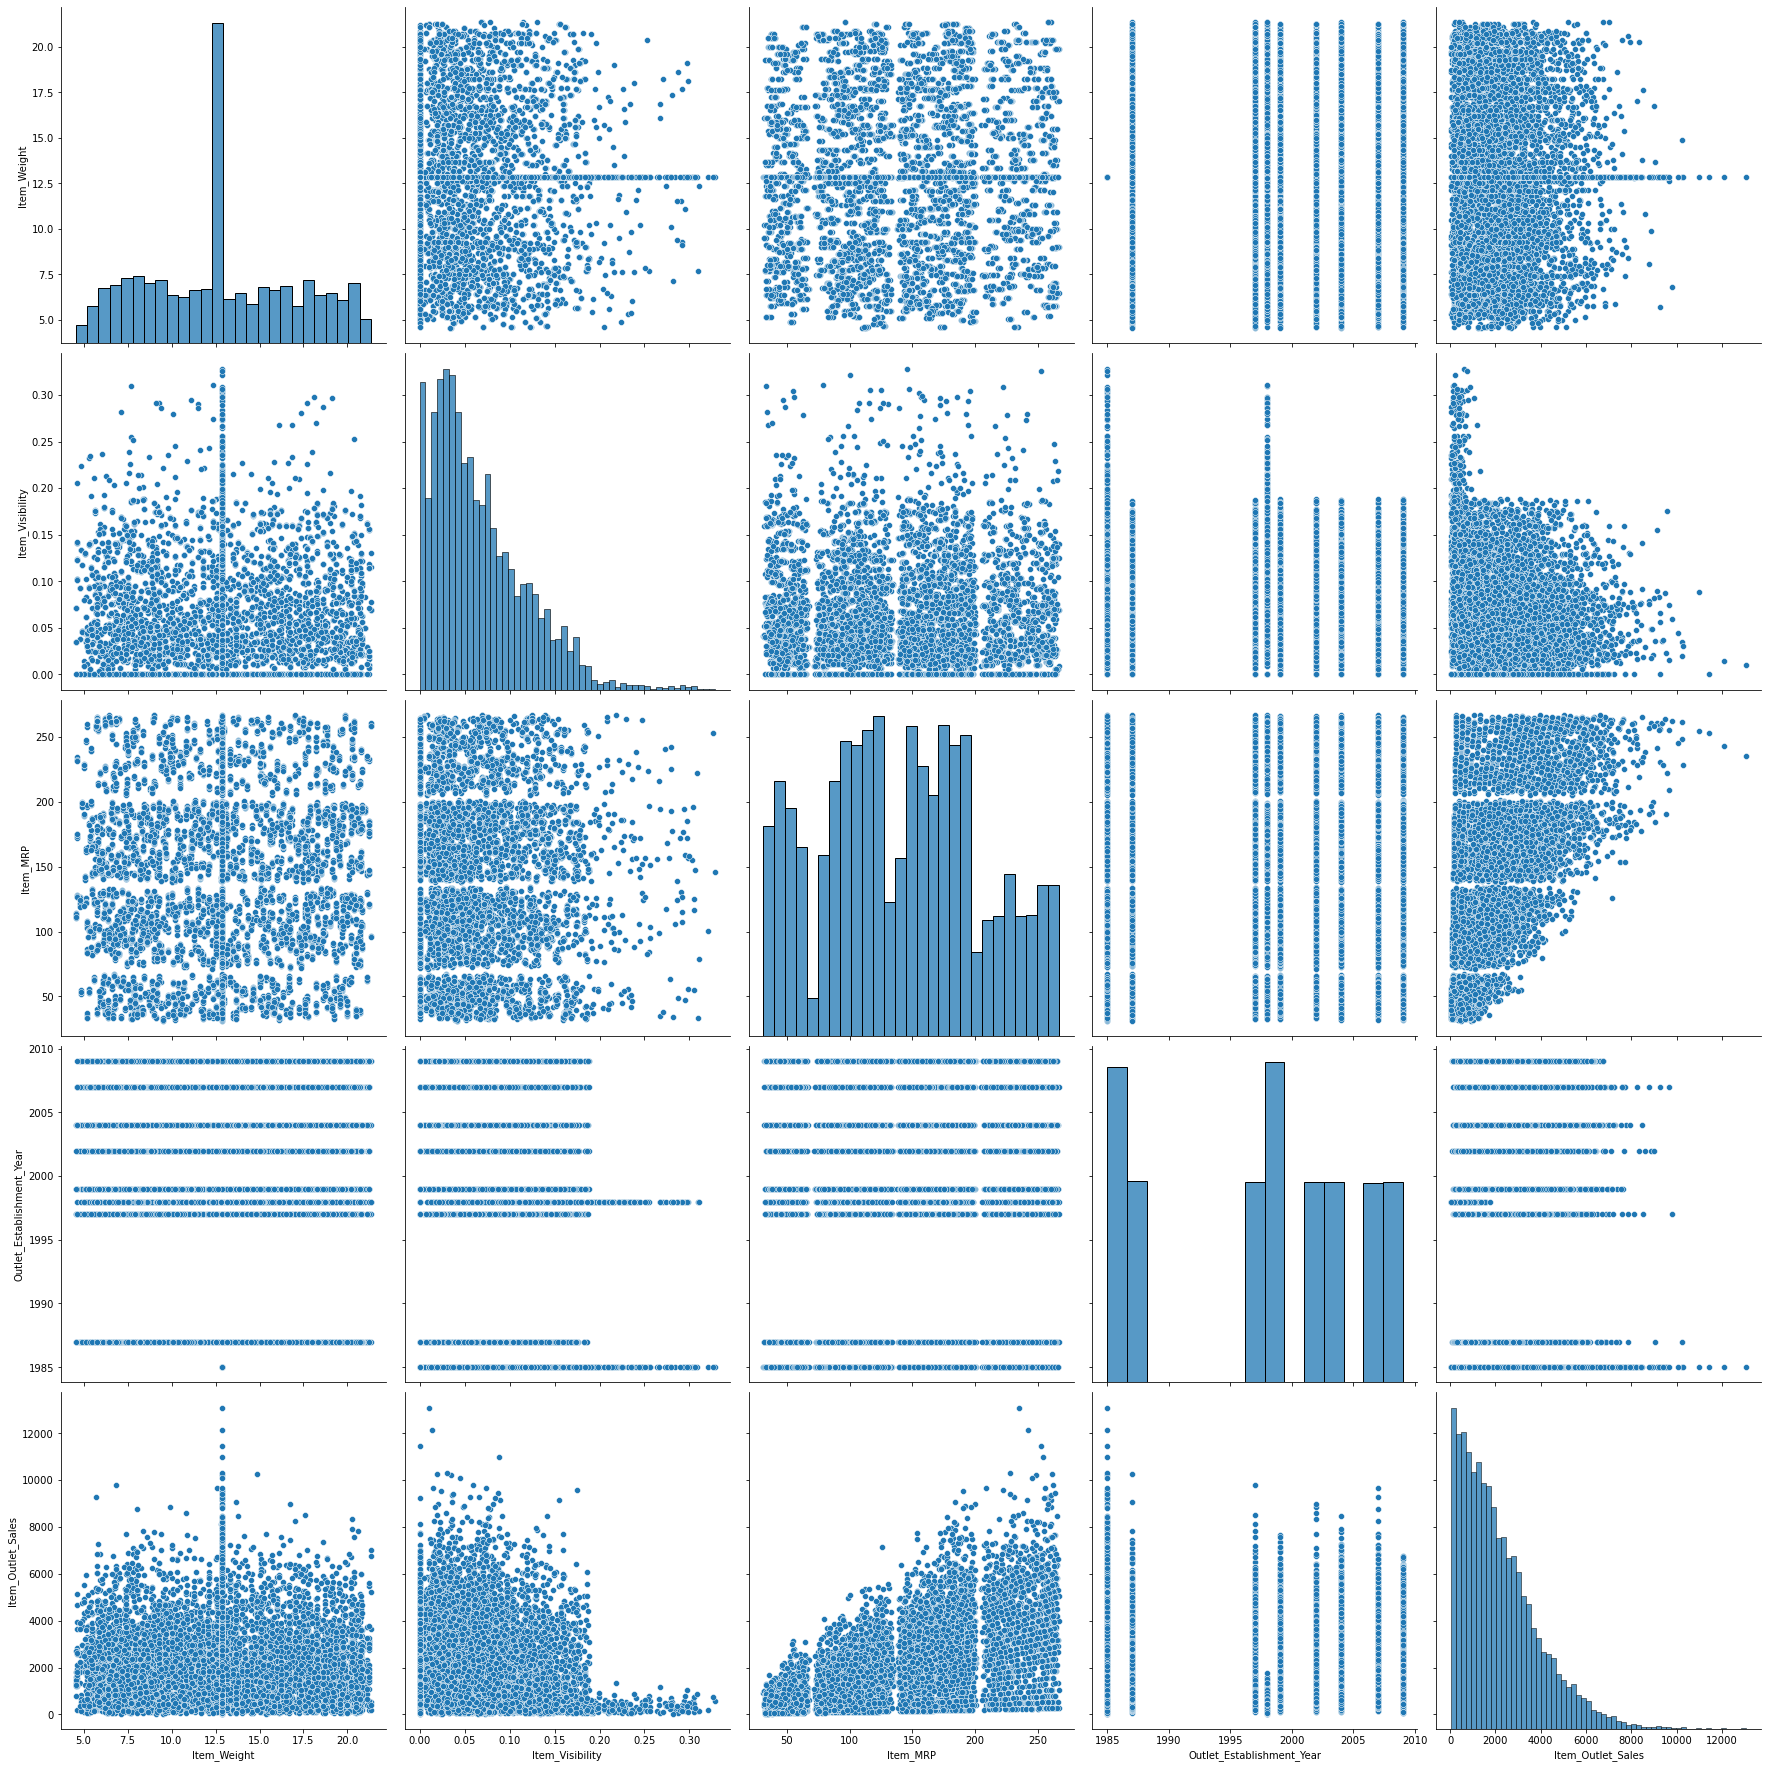

In [19]:
plt.figure(figsize=(7,5))
sns.pairplot(df,height=5)

# Converting Categorical Column with Weights

In [20]:
for i in df.columns:
    if df[i].dtypes == 'object':
        a = df.groupby(i).Item_Outlet_Sales.agg('mean')/100
        a = a.round()
        print(a)

Item_Identifier
DRA12    18.0
DRA24    22.0
DRA59    26.0
DRB01    15.0
DRB13    24.0
         ... 
NCZ30    18.0
NCZ41    18.0
NCZ42    38.0
NCZ53    30.0
NCZ54    32.0
Name: Item_Outlet_Sales, Length: 1559, dtype: float64
Item_Fat_Content
LF         21.0
Low Fat    22.0
Regular    22.0
low fat    21.0
reg        20.0
Name: Item_Outlet_Sales, dtype: float64
Item_Type
Baking Goods             20.0
Breads                   22.0
Breakfast                21.0
Canned                   22.0
Dairy                    22.0
Frozen Foods             21.0
Fruits and Vegetables    23.0
Hard Drinks              21.0
Health and Hygiene       20.0
Household                23.0
Meat                     22.0
Others                   19.0
Seafood                  23.0
Snack Foods              23.0
Soft Drinks              20.0
Starchy Foods            24.0
Name: Item_Outlet_Sales, dtype: float64
Outlet_Identifier
OUT010     3.0
OUT013    23.0
OUT017    23.0
OUT018    20.0
OUT019     3.0
OUT027    37.0
O

In [21]:
for i in df.columns:
    if df[i].dtypes == 'object':
        a = df.groupby(i).Item_Outlet_Sales.agg('mean')/100
        a = a.round()
        a1 = a.to_dict()
        df = df.replace({i:a1})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   float64
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   float64
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   float64
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   float64
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   float64
 10  Outlet_Type                8523 non-null   float64
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 799.2 KB


## Imputing with KNNImputer

In [23]:
imputer = KNNImputer()

In [24]:
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Figure size 504x360 with 0 Axes>

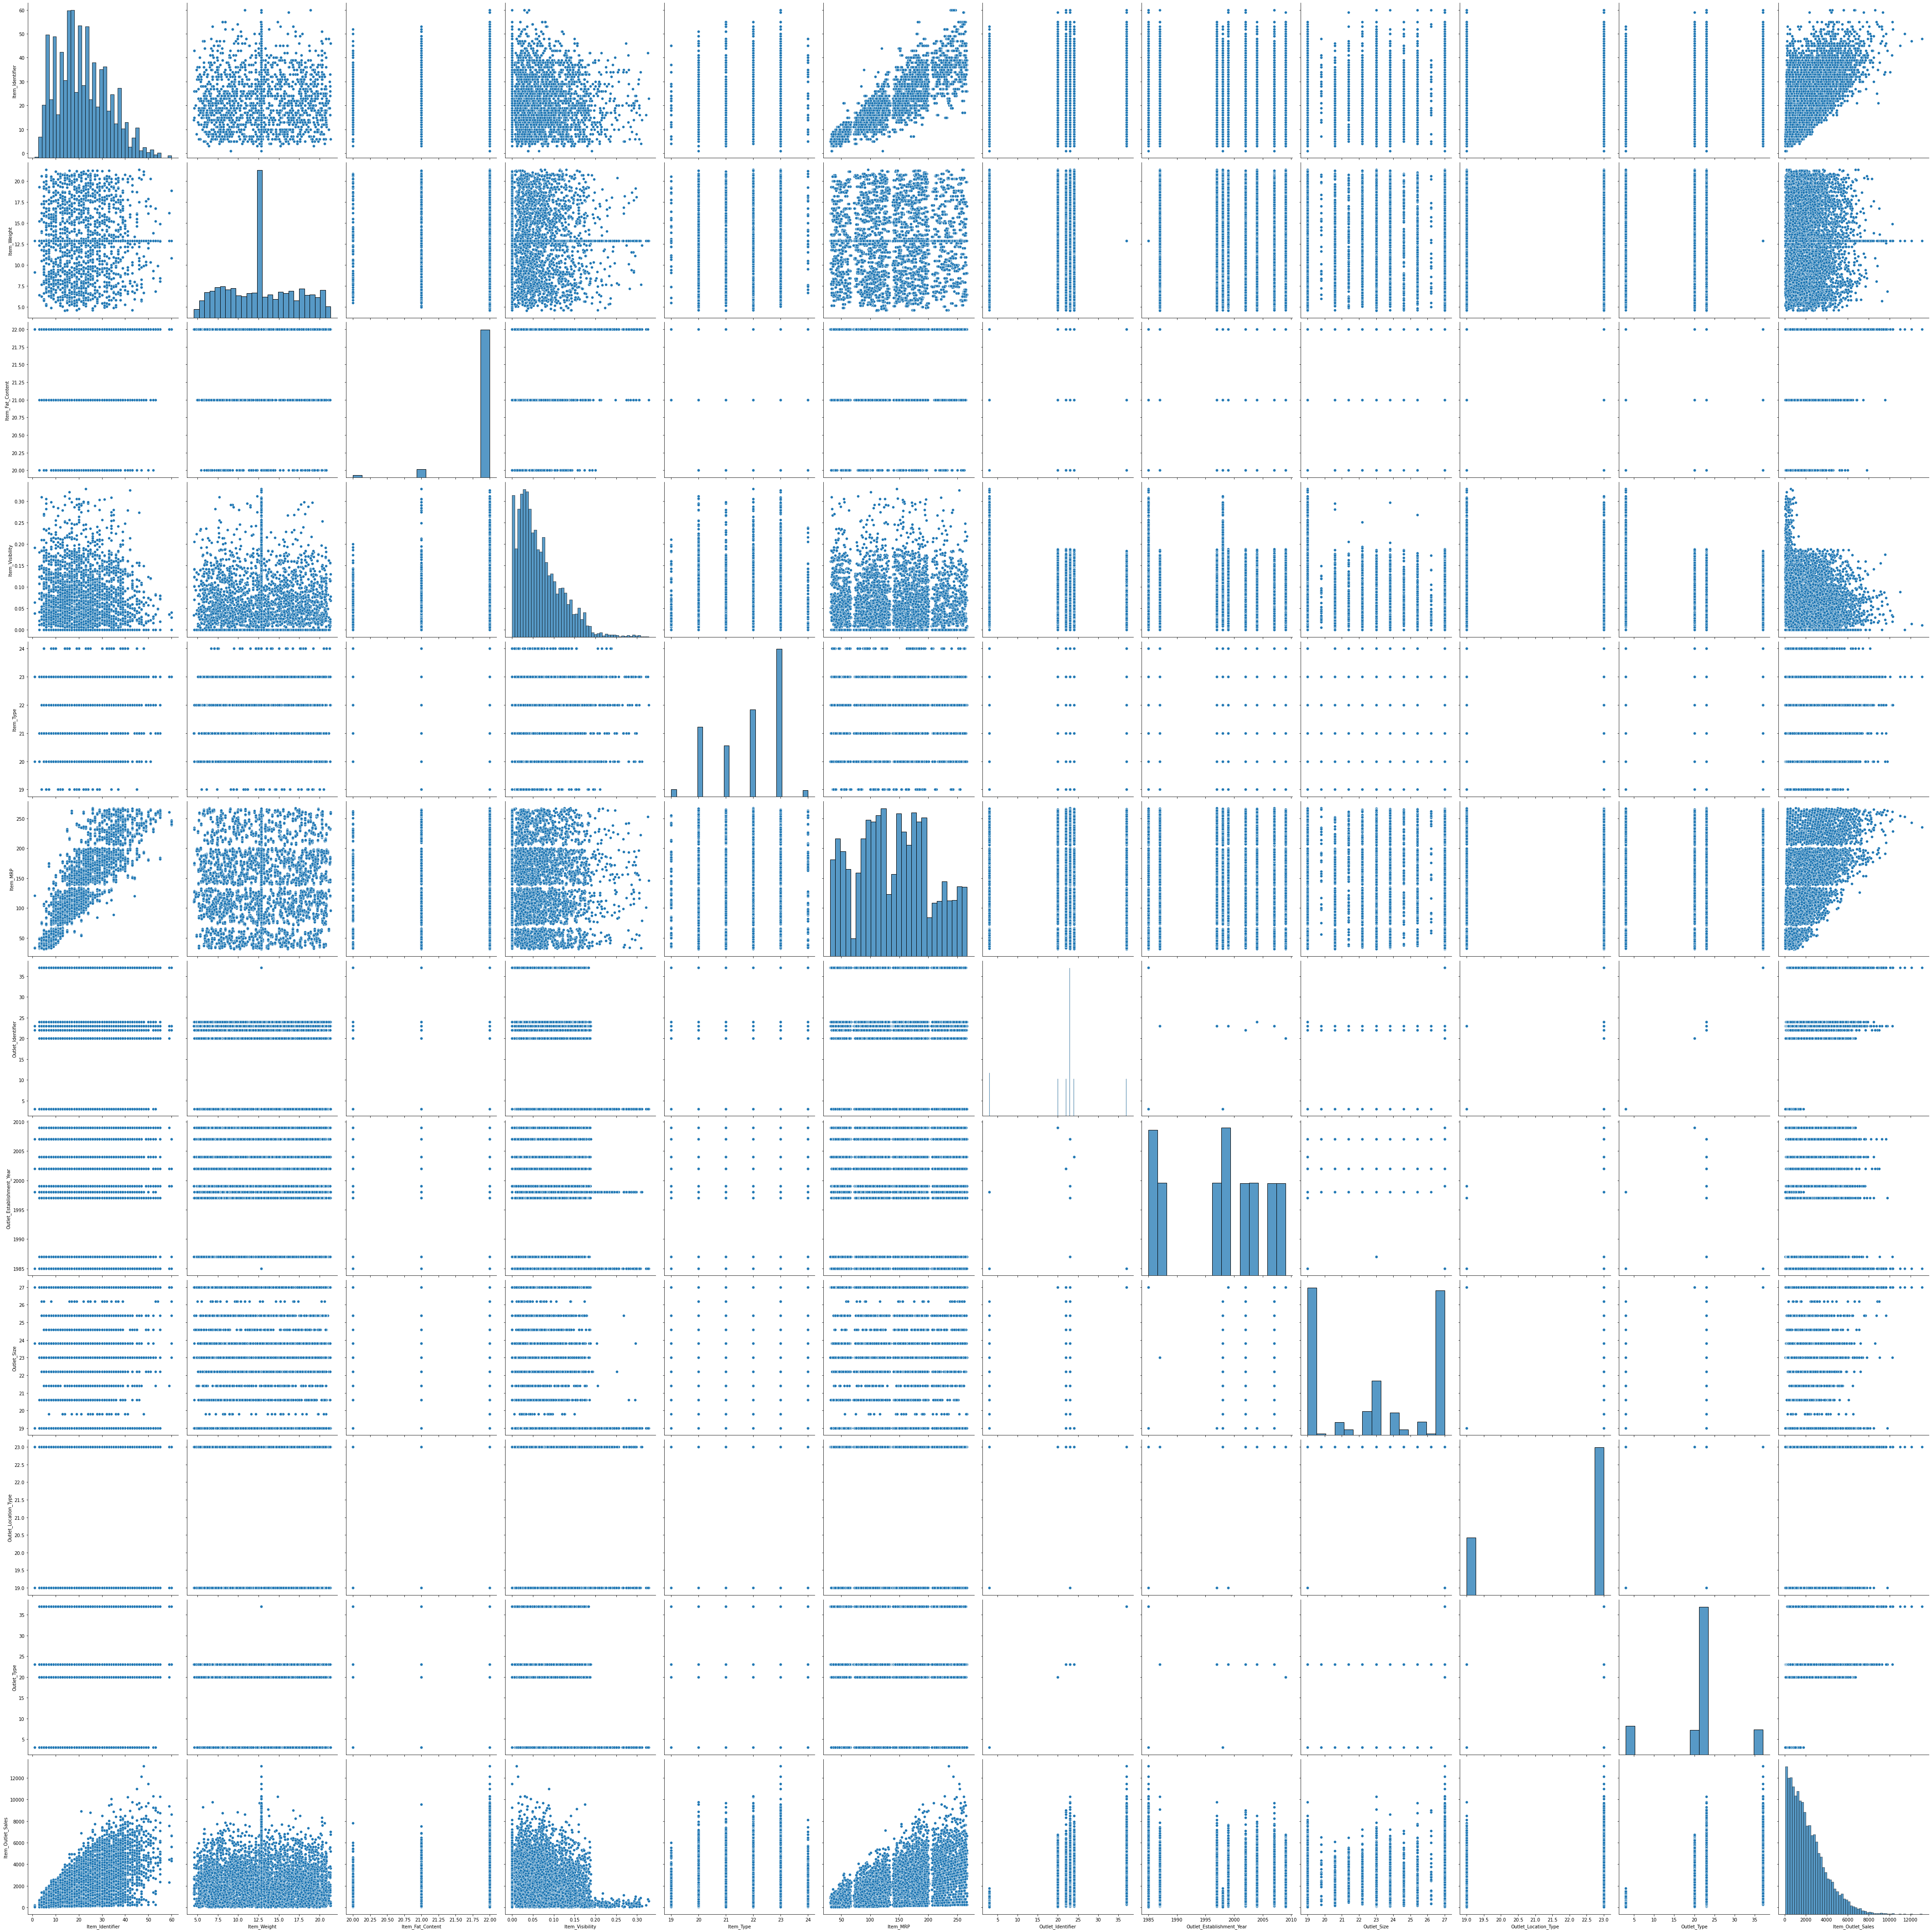

In [26]:
plt.figure(figsize=(7,5))
sns.pairplot(df,height=5)

# Q-Q Plot of the Data

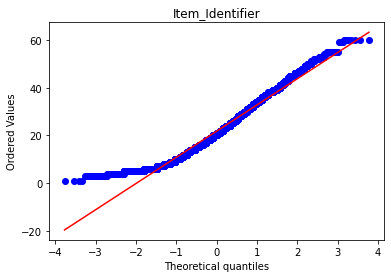

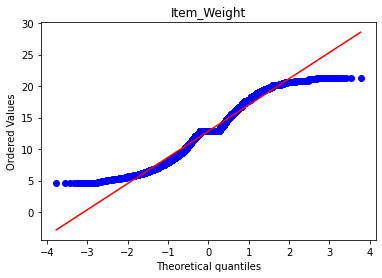

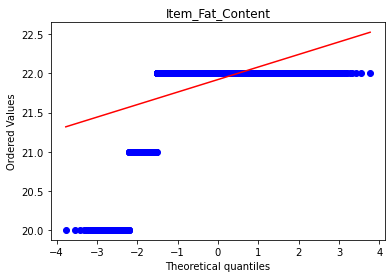

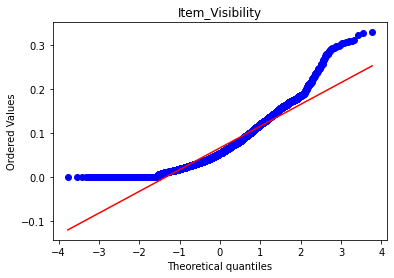

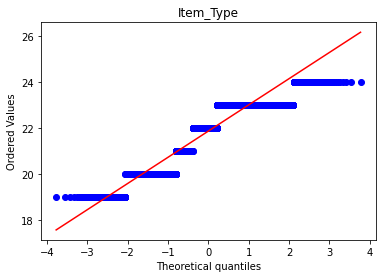

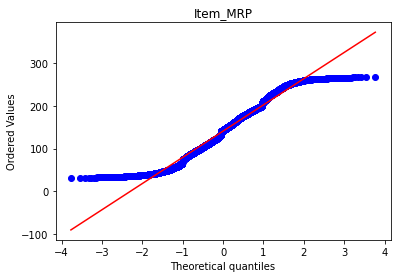

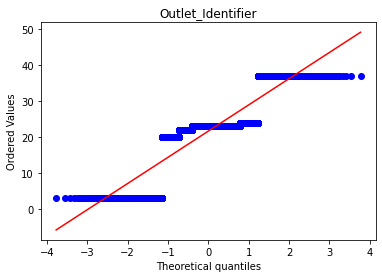

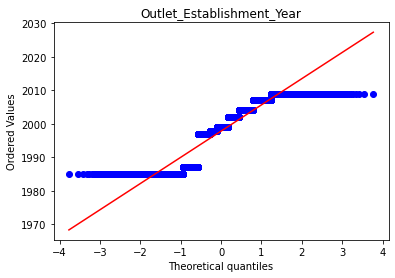

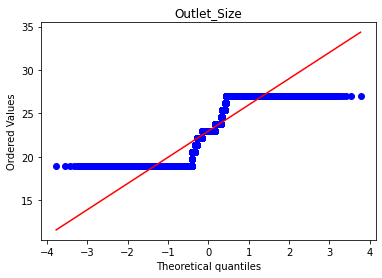

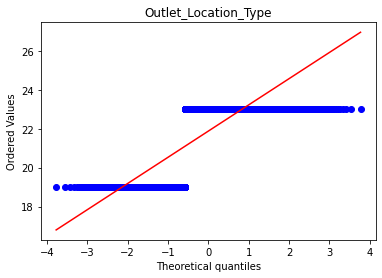

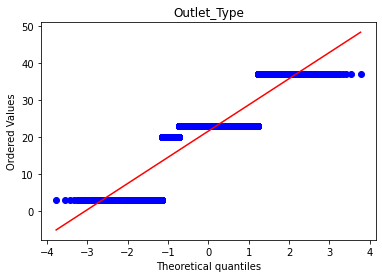

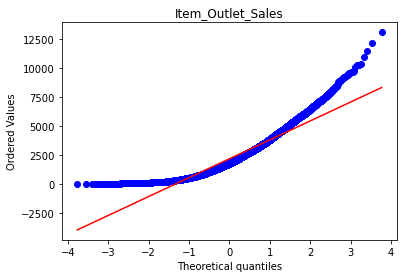

In [27]:
for i in df.columns:
    stats.probplot(df[i], dist="norm", plot=plt)
    plt.title(i)
    plt.show()

# Checking Correlation, Skewness, Kurtosis

In [28]:
df.corr()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Item_Identifier                   1.000000     0.021173          0.009607   
Item_Weight                       0.021173     1.000000          0.003704   
Item_Fat_Content                  0.009607     0.003704          1.000000   
Item_Visibility                  -0.029519    -0.012049         -0.000845   
Item_Type                         0.101969     0.047152         -0.007871   
Item_MRP                          0.868104     0.024756          0.015030   
Outlet_Identifier                 0.077691    -0.001617          0.013077   
Outlet_Establishment_Year         0.002160    -0.008301         -0.007494   
Outlet_Size                       0.043437     0.005117         -0.003331   
Outlet_Location_Type              0.016431    -0.003965         -0.001229   
Outlet_Type                       0.077300    -0.002166          0.013358   
Item_Outlet_Sales                 0.653255     0.011550          0.020923   

                           Item_Visibility  Item_Type  Item_MRP  \
Item_Identifier                  -0.029519   0.101969  0.868104   
Item_Weight                      -0.012049   0.047152  0.024756   
Item_Fat_Content                 -0.000845  -0.007871  0.015030   
Item_Visibility                   1.000000   0.020731 -0.001315   
Item_Type                         0.020731   1.000000  0.099855   
Item_MRP                         -0.001315   0.099855  1.000000   
Outlet_Identifier                -0.247609   0.011650 -0.000080   
Outlet_Establishment_Year        -0.074834  -0.000007  0.005020   
Outlet_Size                      -0.127094   0.010839 -0.001032   
Outlet_Location_Type             -0.061346   0.009252  0.001229   
Outlet_Type                      -0.248182   0.011441 -0.000530   
Item_Outlet_Sales                -0.128625   0.066970  0.567574   

                           Outlet_Identifier  Outlet_Establishment_Year  \
Item_Identifier                     0.077691                   0.002160   
Item_Weight                        -0.001617                  -0.008301   
Item_Fat_Content                    0.013077                  -0.007494   
Item_Visibility                    -0.247609                  -0.074834   
Item_Type                           0.011650                  -0.000007   
Item_MRP                           -0.000080                   0.005020   
Outlet_Identifier                   1.000000                  -0.105165   
Outlet_Establishment_Year          -0.105165                   1.000000   
Outlet_Size                         0.492934                   0.026865   
Outlet_Location_Type                0.227593                   0.201690   
Outlet_Type                         0.998479                  -0.108415   
Item_Outlet_Sales                   0.490560                  -0.049135   

                           Outlet_Size  Outlet_Location_Type  Outlet_Type  \
Item_Identifier               0.043437              0.016431     0.077300   
Item_Weight                   0.005117             -0.003965    -0.002166   
Item_Fat_Content             -0.003331             -0.001229     0.013358   
Item_Visibility              -0.127094             -0.061346    -0.248182   
Item_Type                     0.010839              0.009252     0.011441   
Item_MRP                     -0.001032              0.001229    -0.000530   
Outlet_Identifier             0.492934              0.227593     0.998479   
Outlet_Establishment_Year     0.026865              0.201690    -0.108415   
Outlet_Size                   1.000000              0.158597     0.508746   
Outlet_Location_Type          0.158597              1.000000     0.227931   
Outlet_Type                   0.508746              0.227931     1.000000   
Item_Outlet_Sales             0.246502              0.111287     0.489444   

                           Item_Outlet_Sales  
Item_Identifier                     0.653255  
Item_Weight                         0.011550  
Item_Fat_Content                  

### There is no significant Correlation

In [29]:
df.skew()

Item_Identifier              0.505767
Item_Weight                  0.090561
Item_Fat_Content            -4.375895
Item_Visibility              1.167091
Item_Type                   -0.530813
Item_MRP                     0.127202
Outlet_Identifier           -0.706548
Outlet_Establishment_Year   -0.396641
Outlet_Size                  0.014014
Outlet_Location_Type        -0.979119
Outlet_Type                 -0.711187
Item_Outlet_Sales            1.177531
dtype: float64

In [30]:
df.kurtosis()

Item_Identifier              -0.314073
Item_Weight                  -0.860294
Item_Fat_Content             19.806567
Item_Visibility               1.679445
Item_Type                    -0.973791
Item_MRP                     -0.889769
Outlet_Identifier             1.177315
Outlet_Establishment_Year    -1.205694
Outlet_Size                  -1.634744
Outlet_Location_Type         -1.041570
Outlet_Type                   1.202335
Item_Outlet_Sales             1.615877
dtype: float64

### Checking if there is any Value less or equal to Zero

In [31]:
c = 0
for i in df['Item_Outlet_Sales'].values:
    if i <=0:
        c+=1
print(c)

0


### Taking a log transform of the Target as the datas are large

In [32]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])

# Checking the VIF

In [33]:
b,a = dmatrices('Item_Outlet_Sales ~ Item_Identifier + Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Identifier + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

vif  = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

VIF                   variable
0   66655.441809                  Intercept
1       4.167621            Item_Identifier
2       1.003220                Item_Weight
3       1.000835           Item_Fat_Content
4       1.079675            Item_Visibility
5       1.013998                  Item_Type
6       4.141414                   Item_MRP
7     368.997164          Outlet_Identifier
8       1.100641  Outlet_Establishment_Year
9       1.523758                Outlet_Size
10      1.117413       Outlet_Location_Type
11    377.810472                Outlet_Type

### Checking VIF eleminating Outlet_Identifier

In [34]:
b,a = dmatrices('Item_Outlet_Sales ~ Item_Identifier + Item_Weight + Item_Fat_Content + Item_Visibility + Item_Type + Item_MRP + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

vif  = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['variable'] = a.columns

vif

VIF                   variable
0   66249.534596                  Intercept
1       4.167395            Item_Identifier
2       1.003035                Item_Weight
3       1.000761           Item_Fat_Content
4       1.079472            Item_Visibility
5       1.013980                  Item_Type
6       4.141381                   Item_MRP
7       1.091494  Outlet_Establishment_Year
8       1.363435                Outlet_Size
9       1.117392       Outlet_Location_Type
10      1.540948                Outlet_Type

# Fitting OLS on the Data and checking significant features

In [35]:
mod = sm.OLS(b,a)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     2291.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:20:10   Log-Likelihood:                -6671.6
No. Observations:                8523   AIC:                         1.337e+04
Df Residuals:                    8512   BIC:                         1.344e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -32.9959      1.477    -22.344      0.000     -35.891     -30.101
Item_Identifier               0.0305      0.001     29.037      0.000       0.028       0.033
Item_Weight                  -0.0004      0.001     -0.316      0.752      -0.003       0.002
Item_Fat_Content              0.0055      0.018      0.303      0.762      -0.030       0.041
Item_Visibility              -0.2763      0.116     -2.391      0.017      -0.503      -0.050
Item_Type                    -0.0028      0.005     -0.598      0.550      -0.012       0.006
Item_MRP                      0.0036      0.000     19.105      0.000       0.003       0.004
Outlet_Establishment_Year     0.0191      0.001     26.721      0.000       0.018       0.021
Outlet_Size                  -0.0092      0.002     -4.599      0.000      -0.013      -0.005
Outlet_Location_Type         -0.0298      0.003     -8.816      0.000      -0.036      -0.023
Outlet_Type                   0.0795      0.001     94.442      0.000       0.078       0.081
==============================================================================
Omnibus:                      560.702   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.184
Skew:                          -0.637   Prob(JB):                    3.00e-151
Kurtosis:                       3.574   Cond. No.                     5.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BP Test for Homoscedasticity

In [36]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 152.7053583018844),
 ('p-value', 1.0341555151717728e-27),
 ('f-value', 15.529059196916586),
 ('f p-value', 5.695068412528057e-28)]

## Performing OLS with selected features

In [37]:
d,c = dmatrices('Item_Outlet_Sales ~ Item_Identifier + Item_Visibility + Item_MRP + Outlet_Establishment_Year + Outlet_Size + Outlet_Location_Type + Outlet_Type',data=df,return_type='dataframe')

mod = sm.OLS(d,c)
fii = mod.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     3274.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:20:10   Log-Likelihood:                -6671.9
No. Observations:                8523   AIC:                         1.336e+04
Df Residuals:                    8515   BIC:                         1.342e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -32.9421      1.416    -23.267      0.000     -35.717     -30.167
Item_Identifier               0.0305      0.001     29.035      0.000       0.028       0.033
Item_Visibility              -0.2774      0.115     -2.403      0.016      -0.504      -0.051
Item_MRP                      0.0036      0.000     19.104      0.000       0.003       0.004
Outlet_Establishment_Year     0.0191      0.001     26.728      0.000       0.018       0.021
Outlet_Size                  -0.0092      0.002     -4.610      0.000      -0.013      -0.005
Outlet_Location_Type         -0.0298      0.003     -8.821      0.000      -0.036      -0.023
Outlet_Type                   0.0795      0.001     94.481      0.000       0.078       0.081
==============================================================================
Omnibus:                      560.906   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.489
Skew:                          -0.637   Prob(JB):                    2.58e-151
Kurtosis:                       3.574   Cond. No.                     4.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(fii.resid, fii.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 150.60514298868398),
 ('p-value', 3.029848428352594e-29),
 ('f-value', 21.881480993709076),
 ('f p-value', 1.6564570538920627e-29)]

### Distribution PLot of the Residual

F:\Softwares\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


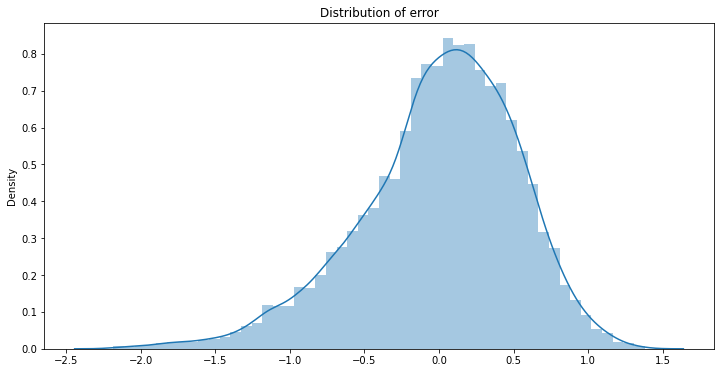

In [39]:
plt.subplots(figsize = (12, 6))
plt.title('Distribution of error')
sns.distplot(fii.resid)
plt.show()

### Q-Q Plot of the Residual

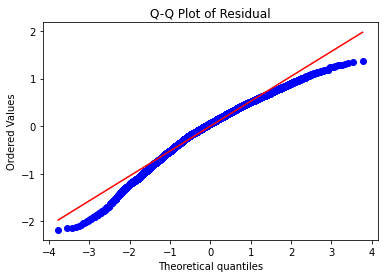

In [40]:
stats.probplot(fii.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residual')
plt.show()

# Performing Feature Selection

In [41]:
features = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

X = df[features]
y = df['Item_Outlet_Sales']

In [42]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.20061137, 0.03387315, 0.00717602, 0.04371953, 0.02669246,
       0.19225911, 0.01805917, 0.05740359, 0.00607317, 0.41413242])

<AxesSubplot:>

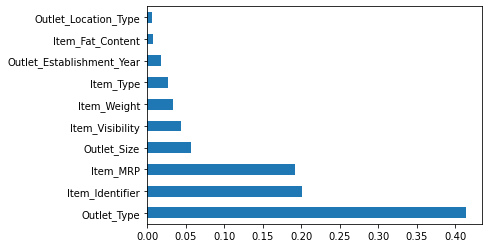

In [43]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')

In [44]:
reduc_feature = ['Item_Identifier','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Splitting Features and Target and Train Test Split

In [45]:
X = df[reduc_feature]
#y = df['Item_Outlet_sales']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
sc = StandardScaler()

In [48]:
X_train = pd.DataFrame(sc.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns = X_test.columns)

# Linear Regression

In [49]:
linear = LinearRegression()

In [50]:
np.mean(cross_val_score(linear,X_train,y_train,cv=5))

0.7264700757886189

In [51]:
linear.fit(X_train,y_train)

LinearRegression()

In [52]:
metrics.r2_score(y_train,linear.predict(X_train))

0.7273431205760723

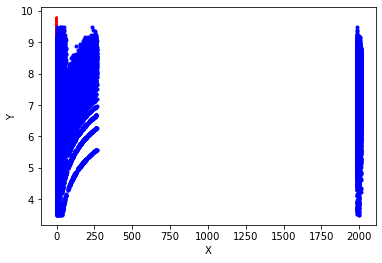

In [53]:
plt.plot(X_train, linear.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [54]:
y_pred = linear.predict(X_test)

In [55]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.7348000139216712

In [56]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.5290444560175717

In [57]:
rmse/y_test.mean()

0.07297103271657232

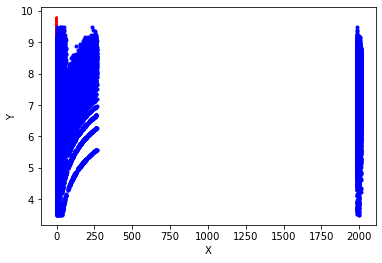

In [58]:
plt.plot(X_train, linear.predict(X_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Lasso Regression

In [59]:
A = df[features]
b = df['Item_Outlet_Sales']

In [60]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [61]:
lso = Lasso(alpha=0.9)

In [62]:
np.mean(cross_val_score(lso,A_train,b_train,cv=5))

0.6844319465085652

In [63]:
lso.fit(A_train,b_train)

Lasso(alpha=0.9)

In [64]:
metrics.r2_score(y_train,lso.predict(A_train))

0.6850861726640409

In [65]:
y_pred_ls = lso.predict(A_test)

In [66]:
r2 = metrics.r2_score(b_test, y_pred_ls)
r2

0.6925733336948219

In [67]:
y_pred_lso = lso.predict(A_test)

In [68]:
r2 = metrics.r2_score(b_test, y_pred_lso)
r2

0.6925733336948219

In [69]:
rmse = np.sqrt(metrics.mean_squared_error(b_test,y_pred_lso))
rmse

0.569608140088627

In [70]:
rmse/y_test.mean()

0.07856597636220684

### Lasso with feature selection

In [71]:
param = np.abs(lso.coef_)
param

array([0.01000128, 0.        , 0.        , 0.        , 0.        ,
       0.00653561, 0.00294306, 0.        , 0.        , 0.06391001])

In [72]:
np.array(features)[param>0]

array(['Item_Identifier', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Type'], dtype='<U25')

In [73]:
A = df[['Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Type']]
b = df['Item_Outlet_Sales']

In [74]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=42)

In [75]:
lso.fit(A_train,b_train)

Lasso(alpha=0.9)

In [76]:
y_pred_ls = lso.predict(A_test)

In [77]:
r2 = metrics.r2_score(b_test, y_pred_ls)
r2

0.6816832607465976

# Ridge Regression

In [78]:
rdg = Ridge(alpha=23, random_state=0)

In [79]:
np.mean(cross_val_score(rdg,X_train,y_train,cv=5))

0.7264630976358044

In [80]:
rdg.fit(X_train,y_train)

Ridge(alpha=23, random_state=0)

In [81]:
metrics.r2_score(y_train,rdg.predict(X_train))

0.7273332773724517

In [82]:
y_pred_rdg = rdg.predict(X_test)

In [83]:
r2_rdg = metrics.r2_score(y_test,y_pred_rdg)
r2_rdg

0.734639603521362

In [84]:
y_pred_rdg = rdg.predict(X_test)

In [85]:
r2_rdg = metrics.r2_score(y_test,y_pred_rdg)
r2_rdg

0.734639603521362

In [86]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_rdg))
rmse

0.5292044322778227

In [87]:
rmse/y_test.mean()

0.0729930982212532

# DecisionTree Regression

In [88]:
dtr = DecisionTreeRegressor(max_depth=5,random_state=0)

In [89]:
np.mean(cross_val_score(dtr,X_train,y_train,cv=5))

0.7635786215135848

In [90]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [91]:
metrics.r2_score(y_train,dtr.predict(X_train))

0.7726681465619716

In [92]:
y_pred_dtr = dtr.predict(X_test)

In [93]:
r2_dtr = metrics.r2_score(y_test,y_pred_dtr)
r2_dtr

0.763141084916354

In [94]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_dtr))
rmse

0.49997730015163155

In [95]:
rmse/y_test.mean()

0.06896180370463316

# KNN Regression

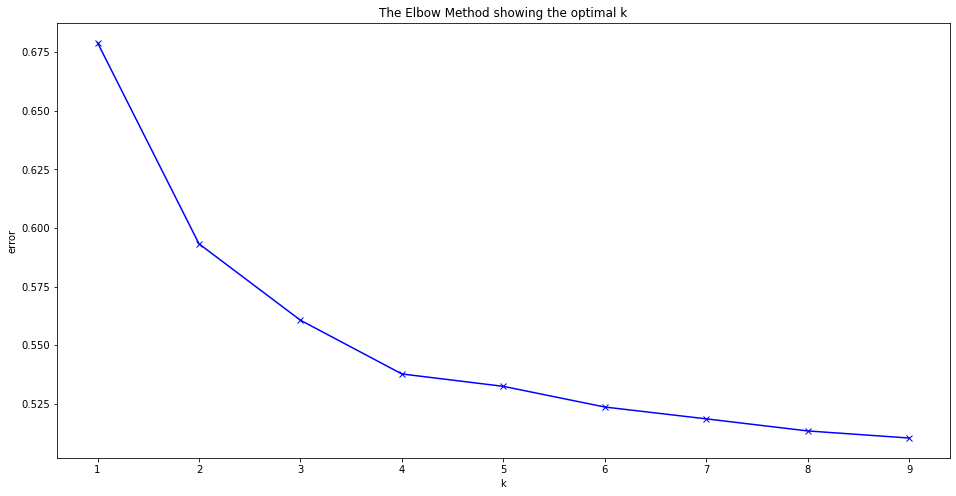

In [96]:
error = []
for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred_KNN = knn.predict(X_test)
    error.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

plt.figure(figsize=(16,8))
plt.plot(range(1, 10), error, 'bx-')
plt.xlabel('k')
plt.ylabel('error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [97]:
knn = KNeighborsRegressor(n_neighbors=13)

In [98]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=13)

In [99]:
r2_knn_train = metrics.r2_score(y_train,knn.predict(X_train))
r2_knn_train

0.7937277026956274

In [100]:
y_pred_knn = knn.predict(X_test)

In [101]:
r2_knn = metrics.r2_score(y_test,y_pred_knn)
r2_knn

0.7582888746258275

In [102]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn))
rmse

0.5050725192422831

In [103]:
rmse/y_test.mean()

0.06966458660828709

# RandomForest

In [104]:
rf = RandomForestRegressor(max_depth=6,random_state=0)

In [105]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [106]:
metrics.r2_score(y_train,rf.predict(X_train))

0.7886138642901632

In [107]:
metrics.r2_score(y_test,rf.predict(X_test))

0.7706639679076243

In [108]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test)))
rmse

0.4919733369238959

In [109]:
rmse/y_test.mean()

0.06785781810208118